In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from iec.analysis import *
from iec.data_readers import *
from iec.viztools import *

import plotly.express as px

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Hourly Average Daily Profiles

In [3]:
# india - esmi
paths = ["data/esmi/ESMI minute-wise voltage data 2014.csv"]

df_list = []

for path in paths:
    esmi_df = esmi_to_standard(pd.read_csv(path))
    df_list.append(daily_profile(esmi_df))
    
esmi_daily = get_multidf_mean(df_list)

In [4]:
# accra, ghana - nline
paths = ["data/nline/ghana/2021-08-01.csv",
         "data/nline/ghana/2021-08-02.csv",
         "data/nline/ghana/2021-08-03.csv"]

df_list = []

for path in paths:
    nline_df = nline_to_standard(pd.read_csv(path))
    nline_df = nline_df[["time", "respondent_id", "voltage"]]
    nline_df = nline_df.rename(columns={'respondent_id': 'id'})
    df_list.append(daily_profile(nline_df))
    
nline_daily = get_multidf_mean(df_list)

/Users/mohini/Documents/repos/rhiza/power-equality/iec/data_readers.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"] = pd.to_datetime(df["time"], errors='coerce')
/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [5]:
# freetown, sierra leone - nline
paths = ["data/nline/sierra-leone/2024-02-05.csv",
         "data/nline/sierra-leone/2024-02-06.csv",
         "data/nline/sierra-leone/2024-02-07.csv"]

df_list = []

for path in paths:
    sl_df = nline_to_standard(pd.read_csv(path))
    sl_df = sl_df[["time", "respondent_id", "voltage"]]
    sl_df = sl_df.rename(columns={'respondent_id': 'id'})
    df_list.append(daily_profile(sl_df))
    
sl_daily = get_multidf_mean(df_list)

Text(0.5, 0, 'hour of day')

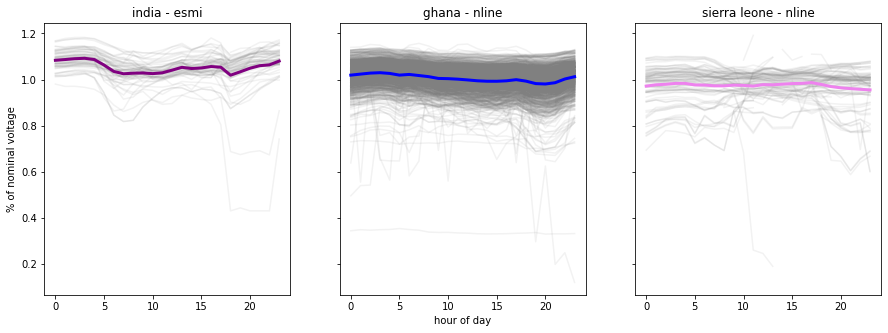

In [6]:
# Plot hourly time series as % of nominal
dfs = [esmi_daily, nline_daily, sl_daily]
vnom = [230, 230, 230]
colors = ["purple", "blue", "violet"]
labels = ["india - esmi", "ghana - nline", "sierra leone - nline"]

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

idx = 0
for df in dfs:
    ax = axs[idx]
    ids = df["id"].unique()
    
    for i in ids:
        y = df[df["id"]==i]
        ax.plot(y.tidx, y.voltage/vnom[idx], color="grey", alpha=0.1)
    ymu = df.groupby("tidx").agg(vmean=("voltage", "mean"))
    ax.plot(ymu.index, ymu.vmean/vnom[idx], color=colors[idx], linewidth=3)
    ax.set_title(labels[idx])
    
    idx += 1
    
axs[0].set_ylabel("% of nominal voltage")
axs[1].set_xlabel("hour of day")

In [19]:
esmi = pd.read_csv("data/esmi/ESMI Coordinates.csv")

ghana = pd.DataFrame({'latitude' : [5.6037], 'longitude' : [-0.1870]})
sl = pd.DataFrame({'latitude' : [8.4657], 'longitude' : [-13.2317]})

In [21]:
import plotly.graph_objects as go
# Create scatter plot on a world map
# Create figure
fig = go.Figure()

# Add each as a separate scatter_geo trace
fig.add_trace(go.Scattergeo(
    lat=esmi['latitude'],
    lon=esmi['longitude'],
    mode='markers',
    marker=dict(color=colors[0], size=2),
    name='india - esmi'
))

# Add each as a separate scatter_geo trace
fig.add_trace(go.Scattergeo(
    lat=ghana['latitude'],
    lon=ghana['longitude'],
    mode='markers',
    marker=dict(color=colors[1], size=8),
    name="ghana - nline"
))

# Add each as a separate scatter_geo trace
fig.add_trace(go.Scattergeo(
    lat=sl['latitude'],
    lon=sl['longitude'],
    mode='markers',
    marker=dict(color=colors[2], size=8),
    name="sierra leone - nline"
))

fig.show()